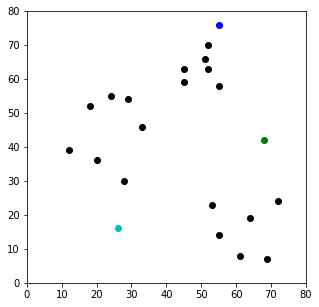

In [30]:
# INICIALIZACION 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#DATA

df = pd.DataFrame({
    
    'x' : [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69,72],
    'y' : [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8 , 19, 7, 24]
    
})

np.random.seed(200)

k=3

#CENTROIDES[i]  = [x , y]

centroide = {
    
    i+1: [np.random.randint(0,80) , np.random.randint(0,80)]
    for i in range(k)
    
}

# GRAFICO PUNTOS Y CENTROIDE  EN MATPLOTLIB

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] , df['y'] , color='k')
colmap = {1 : 'c' , 2 : 'g' , 3: 'b'}

for i in centroide.keys():
    plt.scatter(*centroide[i] , color=colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()









    x   y  distancia_desde_1  distancia_desde_2  distancia_desde_3  cercania  \
0  12  39          26.925824          56.080300          56.727418         1   
1  20  36          20.880613          48.373546          53.150729         1   
2  28  30          14.142136          41.761226          53.338541         1   
3  18  52          36.878178          50.990195          44.102154         1   
4  29  54          38.118237          40.804412          34.058773         3   

  color  
0     c  
1     c  
2     c  
3     c  
4     b  


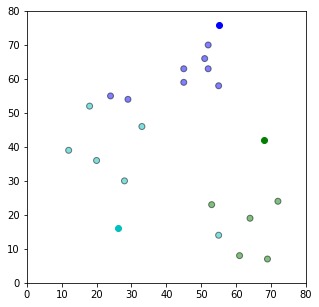

In [24]:
#ASIGNACION DE CENTROIDES

def asignar_centroide(df , centroide):    
    for i in centroide.keys():
        # FUNCION DE DISTANCIAS 
        df['distancia_desde_{}'.format(i)] = (
        
            np.sqrt( (df['x'] - centroide[i][0])**2 + (df['y'] - centroide[i][1])**2 )     
        )

    col_distancia_centroide = ['distancia_desde_{}'.format(i) for i in centroide.keys()]
    df['cercania'] = df.loc[: , col_distancia_centroide].idxmin(axis=1)
    df['cercania'] = df['cercania'].map(lambda x : int(x.lstrip('distancia_desde_')))
    df['color']= df['cercania'].map(lambda x : colmap[x])
    return df


df = asignar_centroide(df , centroide)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()








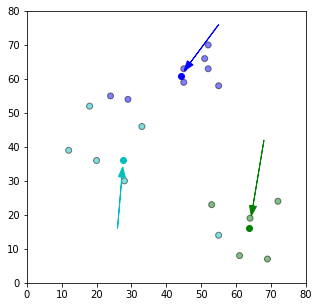

In [27]:
# CAMBIANDO EL CENTROIDE 

import copy

centroide_anterior = copy.deepcopy(centroide)

def update(k):
    for i in centroide.keys():
        centroide[i][0]  = np.mean(df[df['cercania'] == i]['x'])
        centroide[i][1]  = np.mean(df[df['cercania'] == i]['y'])

    return k 
    
centroide = update(centroide)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'] , df['y'] , color=df['color'] , alpha=0.5 , edgecolor='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] ,color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)

for i in centroide.keys():
    old_x = centroide_anterior[i][0]
    old_y = centroide_anterior[i][1]
    dx = (centroide[i][0] - centroide_anterior[i][0]) * 0.75
    dy = (centroide[i][1] - centroide_anterior[i][1]) * 0.75
    ax.arrow(old_x , old_y , dx , dy , head_width = 2 , head_length=3 , fc=colmap[i], ec=colmap[i])
    
    
plt.show()





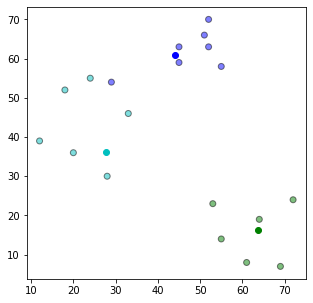

In [28]:
# REPETIR SELECCION DE CENTROIDE

df = asignar_centroide(df , centroide)


#RESULTADO DE LA NUEVA ELECCION 

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])




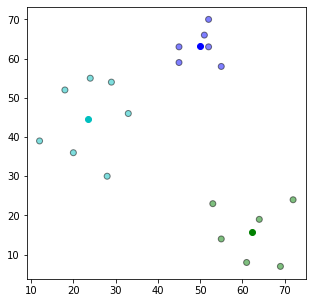

In [29]:
#CONTINUA MIENTRAS TODAS LAS ASIGNACIONES NO CAMBIEN MÁS

while True:
    centroide_cercano = df['cercania'].copy(deep=True)
    centroide = update(centroide)
    df = asignar_centroide(df , centroide)
    if centroide_cercano.equals(df['cercania']):
        break

        
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])   


